In [1]:
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Activation
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import glob
import os


In [3]:
# after you extract the dataset, 
# put cell_images folder in the working directory
#img_dir="Malaria1000/cell_images"  
img_dir='C:\\Users\\adana\\Documents\\Doctorado\\Sem05\\smalltests\\DLCourse\\Malaria\\Malaria1000\\cell_images'
img_size=32


In [4]:
def load_img_data(path):
    image_files = glob.glob(os.path.join(path, "Parasitized/*.png")) + \
                  glob.glob(os.path.join(path, "Uninfected/*.png"))
    X, y = [], []
    for image_file in image_files:
        # 0 for uninfected and 1 for infected
        label = 0 if "Uninfected" in image_file else 1
        # load the image in gray scale
        img_arr = cv2.imread(image_file, cv2.IMREAD_GRAYSCALE)
        # resize the image to (70x70)
        img_resized = cv2.resize(img_arr, (img_size, img_size))
        X.append(img_resized)
        y.append(label)
    return X, y

In [5]:
# load the data
X, y = load_img_data(img_dir)
# reshape to (n_samples, 70, 70, 1) (to fit the NN)
X = np.array(X).reshape(-1, img_size, img_size, 1)
# scale pixels from the range [0, 255] to [0, 1] 
# to help the neural network learn much faster
X = X / 255 

In [6]:
# shuffle & split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y)
print("Total training samples:", X_train.shape)
print("Total validation samples:", X_test.shape[0])

Total training samples: (1800, 32, 32, 1)
Total validation samples: 200


In [7]:
model = Sequential()
model.add(Conv2D(16, (3, 3), input_shape=X_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(16, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(16, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(16))
model.add(Activation("relu"))

model.add(Dense(16))
model.add(Activation("relu"))

model.add(Dense(1))
model.add(Activation("sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [8]:
# train the model with 3 epochs, 64 batch size
model.fit(X_train, np.array(y_train), batch_size=64, epochs=50, validation_split=0.2)

Epoch 1/50
23/23 [==============================] - 6s 75ms/step - loss: 0.6939 - accuracy: 0.4924 - val_loss: 0.6941 - val_accuracy: 0.4611
Epoch 2/50
23/23 [==============================] - 1s 46ms/step - loss: 0.6932 - accuracy: 0.4972 - val_loss: 0.6919 - val_accuracy: 0.5389
Epoch 3/50
23/23 [==============================] - 1s 47ms/step - loss: 0.6928 - accuracy: 0.5063 - val_loss: 0.6930 - val_accuracy: 0.4778
Epoch 4/50
23/23 [==============================] - 1s 45ms/step - loss: 0.6920 - accuracy: 0.5389 - val_loss: 0.6906 - val_accuracy: 0.6083
Epoch 5/50
23/23 [==============================] - 1s 45ms/step - loss: 0.6905 - accuracy: 0.5854 - val_loss: 0.6882 - val_accuracy: 0.6417
Epoch 6/50
23/23 [==============================] - 1s 45ms/step - loss: 0.6841 - accuracy: 0.5597 - val_loss: 0.6756 - val_accuracy: 0.5917
Epoch 7/50
23/23 [==============================] - 1s 45ms/step - loss: 0.6775 - accuracy: 0.6056 - val_loss: 0.6583 - val_accuracy: 0.6389
Epoch 8/50
23

In [9]:
loss, accuracy = model.evaluate(X_test, np.array(y_test), verbose=0)
print(f"Testing on {len(X_test)} images, the results are\n Accuracy: {accuracy} | Loss: {loss}")

Testing on 200 images, the results are
 Accuracy: 0.8149999976158142 | Loss: 0.47417956590652466


In [13]:
# testing some images
infected_cell = "C:\\Users\\adana\\Documents\\Doctorado\\Sem05\\smalltests\\DLCourse\\Malaria\\Malaria1000\\testsamples\\parasitized\\p1.png"
#C:\Users\adana\Documents\Doctorado\Sem05\smalltests\DLCourse\Malaria\Malaria1000
#infected_cell = "../Malaria/testsamples/parasitized/p1.png"
uninfected_cell ="C:\\Users\\adana\\Documents\\Doctorado\\Sem05\\smalltests\\DLCourse\\Malaria\\Malaria1000\\testsamples\\uninfected\\u1.png"

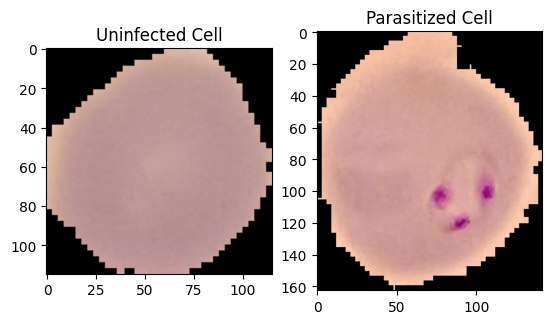

In [14]:

_, ax = plt.subplots(1, 2)
ax[0].imshow(plt.imread(uninfected_cell))
ax[0].title.set_text("Uninfected Cell")
ax[1].imshow(plt.imread(infected_cell))
ax[1].title.set_text("Parasitized Cell")
plt.show()

In [15]:
img_arr_uninfected = cv2.imread(uninfected_cell, cv2.IMREAD_GRAYSCALE)
img_arr_infected = cv2.imread(infected_cell, cv2.IMREAD_GRAYSCALE)
# resize the images to (70x70)
img_arr_uninfected = cv2.resize(img_arr_uninfected, (img_size, img_size))
img_arr_infected = cv2.resize(img_arr_infected, (img_size, img_size))
# scale to [0, 1]
img_arr_infected = img_arr_infected / 255
img_arr_uninfected = img_arr_uninfected / 255
# reshape to fit the neural network dimensions
# (changing shape from (70, 70) to (1, 70, 70, 1))
img_arr_infected = img_arr_infected.reshape(1, *img_arr_infected.shape)
img_arr_infected = np.expand_dims(img_arr_infected, axis=3)
img_arr_uninfected = img_arr_uninfected.reshape(1, *img_arr_uninfected.shape)
img_arr_uninfected = np.expand_dims(img_arr_uninfected, axis=3)

# perform inference
infected_result = model.predict(img_arr_infected)[0][0]
uninfected_result = model.predict(img_arr_uninfected)[0][0]
print(f"Infected: {infected_result}")
print(f"Uninfected: {uninfected_result}")

# save the model & weights
model.save("malaria-cell-cnn.h5")

1/1 [==============================] - 0s 48ms/step
Infected: 0.9919942021369934
Uninfected: 0.018508397042751312


C:\Users\adana\anaconda3\envs\aaa\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
